# Jobathon Insurance Analysis: Customer Value Strategies

## Background Information

Jobathon, an insurance company serving nationwide, leverages extensive datasets in the insurance and finance sector. These datasets feature a unique label assigning a Customer Lifetime Value (CLV) score to clients who have purchased insurance, derived from various factors. This initiative underscores Jobathon's commitment to harnessing data-driven insights to enhance service delivery and customer satisfaction.

## **PLAN**

### 1.1 Plan

Our goal is to utilize linear regression and K-means clustering models to accurately predict Customer Lifetime Value (CLV) for Jobathon Insurance's clientele. By analyzing the Insurance and Finance Data, which includes a CLV score for each customer based on diverse factors, we aim to uncover insights that will enable targeted customer engagement and optimize service offerings for enhanced customer value.

**CLV = (Average Purchase Value) × (Average Purchase Frequency Rate) × (Average Customer Lifespan)**

## **Analyze**

### 2.1 Import, Load and Examine

In [2]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load dataset
df_train = pd.read_csv("Jobathon_Insurance_test.csv")
df_test = pd.read_csv("Jobathon_Insurance_train.csv")

# Combine data set
df = pd.concat([df_train, df_test], ignore_index=False)

# Drop "CLV" and "id" columns because we don't need it for analysis
df.drop(["clv", "id"], axis=1, inplace=True)
df

,gender,area,qualification,income,marital_status,number_of_year,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum


In [4]:
# Basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148987 entries, 0 to 89391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          148987 non-null  object
 1   area            148987 non-null  object
 2   qualification   148987 non-null  object
 3   income          148987 non-null  object
 4   marital_status  148987 non-null  int64 
 5   number_of_year  148987 non-null  int64 
 6   claim_amount    148987 non-null  int64 
 7   num_policies    148987 non-null  object
 8   policy          148987 non-null  object
 9   type_of_policy  148987 non-null  object
dtypes: int64(3), object(7)
memory usage: 12.5+ MB


In [5]:
df.describe()

,marital_status,number_of_year,claim_amount
count,148987.000000,148987.000000,148987.000000
mean,0.576064,4.605523,4358.303201
std,0.494182,2.287299,3272.692800
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2402.000000
50%,1.000000,5.000000,4095.000000
75%,1.000000,6.000000,6098.000000
max,1.000000,8.000000,32534.000000


### 2.2 Data Cleaning

#### 2.2.1 Missing Value

In [6]:
# Check total missing value in dataset
df.isna().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
number_of_year    0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

#### 2.2.2 Outliers

It seems like no outliers need to be handle.

#### 2.2.3 Duplicates

In [7]:
# Check duplicates
df.duplicated().sum()

23786

In [8]:
# Drop duplicates
df = df.drop_duplicates()

### 2.3 Exploratory Data Analysis (EDA)

We will begin check by value counts for every columns.

In [9]:
# Check value counts for each columns
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for gender:
gender
Male      71758
Female    53443
Name: count, dtype: int64


Value counts for area:
area
Urban    97731
Rural    27470
Name: count, dtype: int64


Value counts for qualification:
qualification
High School    65502
Bachelor       54195
Others          5504
Name: count, dtype: int64


Value counts for income:
income
5L-10L           71496
2L-5L            33088
More than 10L    17486
<=2L              3131
Name: count, dtype: int64


Value counts for marital_status:
marital_status
1    70191
0    55010
Name: count, dtype: int64


Value counts for number_of_year:
number_of_year
6    24453
7    17994
5    17463
4    14740
2    13144
8    10934
1    10868
3    10222
0     5383
Name: count, dtype: int64


Value counts for claim_amount:
claim_amount
0        6433
3919       51
4023       49
4006       49
3846       49
         ... 
20444       1
14722       1
11381       1
9319        1
17143       1
Name: count, Length: 12356, dtype: int64


Value counts for nu

#### 2.3.1 Claim Amount and Frequency

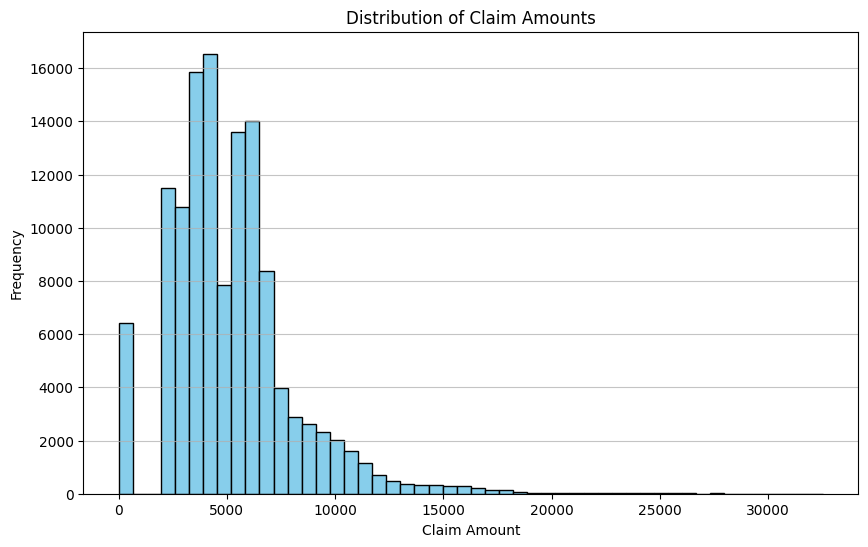

In [10]:
# Plotting the histogram for 'claim_amount'
plt.figure(figsize=(10, 6))
plt.hist(df["claim_amount"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

The graph is positively skewed, and the majority of customers have claim amounts ranging from approximately 2500 to 7500.

#### 2.3.2 Claim Amount and Number of Year

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


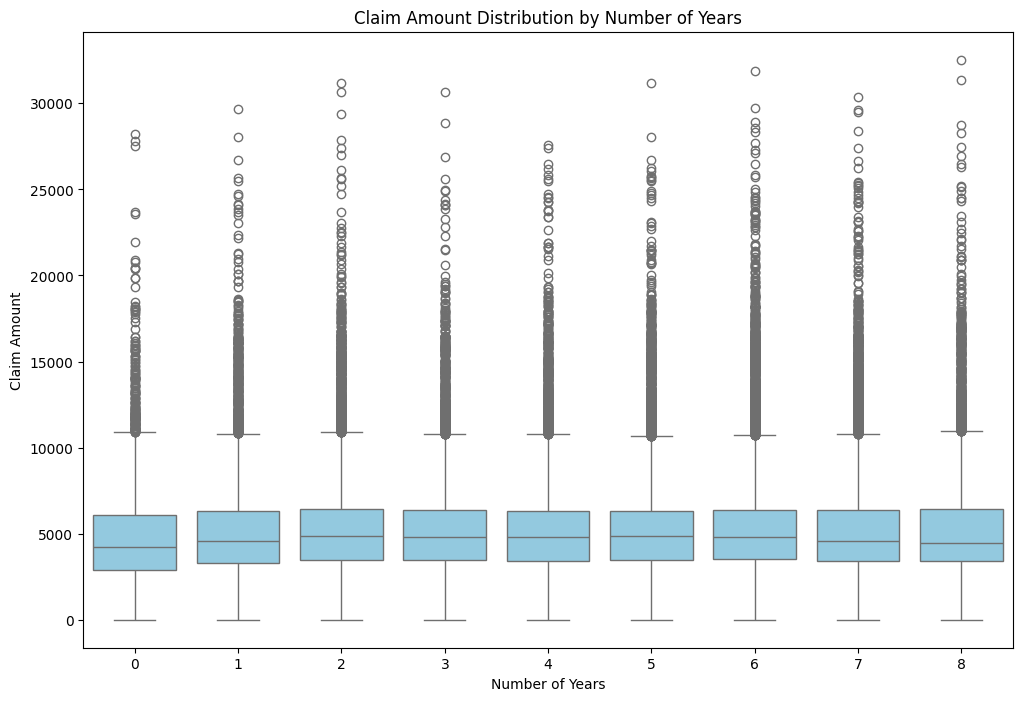

In [11]:
# Boxplot for 'claim_amount' across different 'number_of_year'
plt.figure(figsize=(12, 8))
sns.boxplot(x="number_of_year", y="claim_amount", data=df, color="skyblue")
plt.title("Claim Amount Distribution by Number of Years")
plt.xlabel("Number of Years")
plt.ylabel("Claim Amount")
plt.show()

The graph indicates that the duration of insurance ownership does not significantly affect claim amounts, as evidenced by the boxplots displaying very similar ranges across different years of insurance purchase.

#### 2.3.3 Overall Relationship

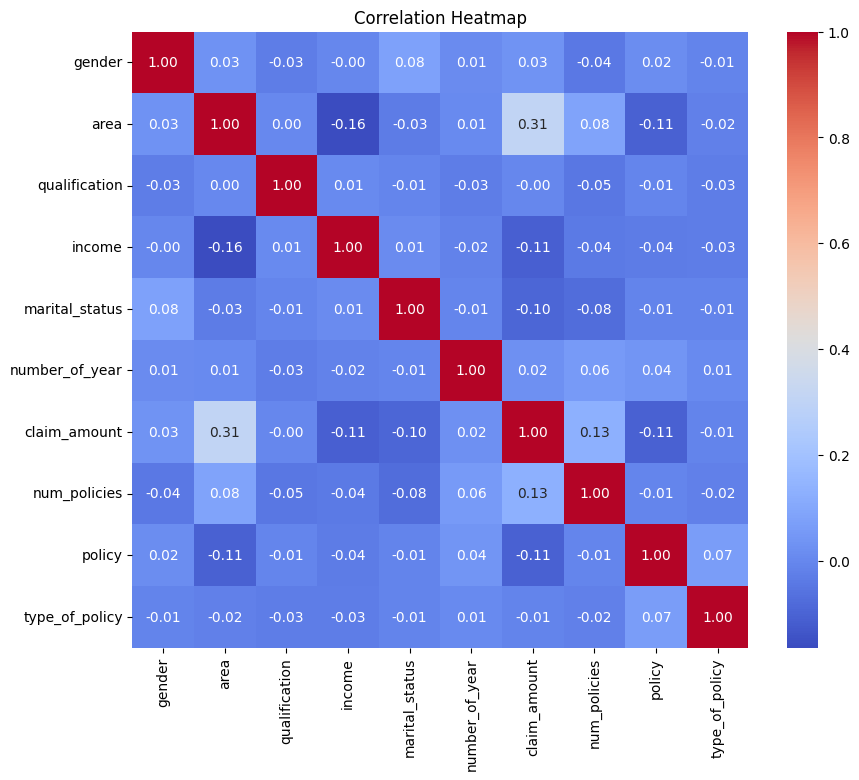

In [12]:
# Make a copy of the original DataFrame to preserve the original data
numeric_df = df.copy()

# List of columns to convert from strings to categorical codes
columns_to_convert = ["gender", "area", "qualification", "income", "num_policies", "policy", "type_of_policy"]

# Convert each column to categorical and then to its codes in the copy of the DataFrame
for column in columns_to_convert:
    numeric_df[column] = pd.Categorical(numeric_df[column]).codes

# Now, generate a heatmap using the modified DataFrame (numeric_df) with numerical codes
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show();

The heatmap reveals a lack of significant correlation between most pairs of variables, only exception relationship is between "area" and "claim amount," which exhibits a correlation coefficient of 0.31.

## **Construct**

### 3.1 Data Processing

We need to convert string to numeric numbers. As we did in 2.3.3, we need to use another method.


In [13]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ["gender", "area", "qualification", "income", "num_policies", "policy", "type_of_policy"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.fit_transform(df_test[column])

/tmp/ipykernel_1073/3985052713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_1073/3985052713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_1073/3985052713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p


### 3.2 Linear Regreesion

**Predicting CLV Using Multiple Variables**

We will predict the CLV based on a variety of factors, which we can approach as follows: 
- **Use Multiple Independent Variables:** These could include any variable in the dataset except the dependent variable. The idea is that these variables collectively influence the CLV.
- **Dependent Variable:** Since the actual CLV is not directly provided, we will choose the claim amount, assuming customers have **fewer** claims and thus have a higher CLV.

> *Note: in some industries, more engagement or higher transaction values might directly translate to higher CLV. But in insurance, this is the opposite; the relationship can be more complex.*
- **Objective:** The goal here is to identify how different customer attributes and behaviors predict the proxy of CLV. This can help in tailoring products, services, and marketing efforts to maximize the lifetime value of customers.

#### 3.2.1 Build Model

In [14]:
# Set dependent and independent variable
x = df_train.drop(["claim_amount"], axis=1)
y = df_train["claim_amount"]

# Initialize the model
lr_model = LinearRegression()

# Train model
lr_model.fit(x,y)

LinearRegression()

#### 3.2.2 Coefficients & Intercepts and Formula

The multiple linear regression model is: **Y = a + bX1 + cX2 + dX3 + ... + nXn**

In [15]:
# Get value of coef and intercept
print(lr_model.coef_)
print(lr_model.intercept_)

# Round coefficients and intercept to desired precision
coefficients = [coef.round(4) for coef in lr_model.coef_]
intercept = round(lr_model.intercept_, 2)

# Print out the formula
# Adjust the number of coefficients and their corresponding X's as necessary
print(f"Model formula is: Y = {intercept} + {coefficients[0]}*X1 + {coefficients[1]}*X2 + {coefficients[2]}*X3...")

# Get score of our model
lr_score = lr_model.score(x, y)
print(lr_score)

[ 5.00362194e-04  2.42292195e+02  2.96996119e+03  1.07059837e+02
 -2.58005167e+02 -5.39616518e+02  1.72108538e+00  6.87562581e+02
 -3.16862891e+02 -3.63419872e+01]
2343.3205527241425
Model formula is: Y = 2343.32 + 0.0005*X1 + 242.2922*X2 + 2969.9612*X3...
0.23516930537571568


#### 3.2.3 Continue

Our initial model yielded an R^2 accuracy score of 0.23, indicative of a poor fit, suggesting that the linear regression model is not capturing the underlying pattern in the data. If the dependent variable is binary or categorical, logistic regression maybe more appropriate.

The score even poorer fit than before, suggesting that the linear regression model is not capturing the underlying pattern in the data. If the dependent variable is binary or categorical, logistic regression maybe more appropriate.

### 3.3 Logistic Regression

#### 3.3.1 Build Model & Train

In [16]:
# Before build model, we need transform dependent variable "claim_amount" to binary
threshold = df_train["claim_amount"].median()
df_train["claim_amount_binary"] = (df_train["claim_amount"] > threshold).astype(int)
df_test["claim_amount_binary"] = (df_test["claim_amount"] > threshold).astype(int)

# Prepare your independent variables (X) and dependent variable (y) for both datasets
x_train = df_train[["gender", "area", "qualification", "number_of_year"]]
y_train = df_train["claim_amount_binary"]

x_test = df_test[["gender", "area", "qualification", "number_of_year"]]
y_test = df_test["claim_amount_binary"]

# Initialize & train the model
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Get accuracy score
y_pred_lg = lg_model.predict(x_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)

# Output result
print(f"Model accuracy on test data: {accuracy_lg}")
print("Coefficients:", lg_model.coef_)
print("Intercept:", lg_model.intercept_)

Model accuracy on test data: 0.6926123143010561
Coefficients: [[-1.90044063e-02  2.17916467e+00  8.76632678e-02  5.24759670e-04]]
Intercept: [-1.62875418]


We get an accuracy score of 0.69 with logistic regression which is a significant improvement!

But this is still very low; so it doesn't directly cause an overfit issue. But to be safe, that's to check if it's overfiting.

#### 3.3.2 Overfit Check

Let's check overfitting by use VIF score. 
- Score < 10, There is no multicollinearity among independent variables 
- 10 <= Score >= 100, There is strong multicollinearity among the independent variables, which should be dealt with according to the situation
- Score >= 100, There is strong multicollinearity among the independent variables, which must be dealt with


In [17]:
# Get VIF score to see if overfit
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
vif

[13.781893137516297,
 2.2844853101082268,
 3.384288428442161,
 2.0802566951674555,
 2.399803679990654,
 2.3327630628922105,
 4.84320980414295,
 3.090594074979127,
 1.4992570089049078,
 3.0857516657570305]

VIF score are very low, there is no multicollinearity among independent variables. 

Despite the logistic regression model not achieving the expected prediction score, I'll explore an additional approach as a bonus segment by employing a Random Forest and XGBoost model. This exercise is driven by curiosity to observe the potential variance in accuracy scores. To maintain simplicity and avoid overfitting, I will proceed without Hyperparameter Tuning or extensive model evaluation. This will provide a straightforward comparison of the performance between the logistic regression and Random Forest models.


In [18]:
# Random Forest

# Build & Train model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Start predict
y_pred_rf = rf_model.predict(x_test)

# Find accuracy score
rf_score = accuracy_score(y_test, y_pred_rf)
rf_score

0.6919075532486129

In [19]:
# XGBoost

# Initialize and train the model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Start predict
y_pred_xgb = xgb_model.predict(x_test)

# Find accuracy score
xgb_score = accuracy_score(y_test, y_pred_xgb)
xgb_score

0.6919075532486129

Obtaining the same 0.69 accuracy score using all three model is interesting and may indicate several possibilities:

- **Intrinsic data characteristics:** This score indicates that this is likely to be an upper limit on prediction accuracy given the current characteristics and their relationship to the target variable in the dataset. The data may contain noise or lack additional information features that could improve prediction performance.
- **Model complexity:** While random forest/XGBoost is a more complex model, capable of capturing non-linear relationships and interactions between features, the fact that it does not outperform the logistic regression model may indicate that the problem or data features do not benefit as much from the increase. complexity.
- **Default hyperparameters:** Using the default hyperparameters may not be optimal for specific data set. Although our goal is to avoid overfitting by not tuning hyperparameters, some degree of tuning may be necessary to unlock the potential of your random forest/XGBoost model.
- **Evaluation Metrics:** Three models achieved an accuracy score of 0.69, demonstrating consistency, but we also need emphasizing consideration of other evaluation metrics.

### 3.4 K-Mean

Note here, K-mean is an unsupervised learning algorithm used for clustering, not prediction. We will use this method to identify distinct groups or segments of customers with similar attributes or behaviors.

#### 3.4.1 Data Normalization

In [20]:
# Set dependent variable
x = df_train.drop(["claim_amount"], axis=1)

# Data Normalization
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[-1.73202174, -1.13849807, -1.51087644, ...,  0.83911041,
         1.45688694, -0.99988255],
       [-1.73196362, -1.13849807,  0.66186749, ..., -0.69507535,
        -0.01031559, -0.99988255],
       [-1.73190549,  0.87835019, -1.51087644, ...,  0.83911041,
        -1.47751813, -0.99988255],
       ...,
       [ 1.73190549, -1.13849807,  0.66186749, ...,  0.83911041,
        -0.01031559, -0.99988255],
       [ 1.73196362,  0.87835019, -1.51087644, ..., -0.69507535,
         1.45688694, -0.99988255],
       [ 1.73202174, -1.13849807,  0.66186749, ...,  0.83911041,
        -0.01031559,  1.00011747]])

In [21]:
# Convert 2D array to Dataframe table
x_scale = pd.DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale

,id,gender,area,qualification,income,marital_status,number_of_year,num_policies,policy,type_of_policy,claim_amount_binary
0,-1.732022,-1.138498,-1.510876,0.709051,-0.100201,-1.167759,0.604469,0.69173,0.839110,1.456887,-0.999883
1,-1.731964,-1.138498,0.661867,0.709051,-1.176144,-1.167759,-0.271766,0.69173,-0.695075,-0.010316,-0.999883
2,-1.731905,0.878350,-1.510876,0.709051,-0.100201,0.856341,1.042587,0.69173,0.839110,-1.477518,-0.999883
3,-1.731847,-1.138498,-1.510876,-1.055582,2.051685,0.856341,-1.148001,0.69173,0.839110,1.456887,-0.999883
4,-1.731789,-1.138498,0.661867,0.709051,-1.176144,-1.167759,0.166352,0.69173,0.839110,1.456887,1.000117
...,...,...,...,...,...,...,...,...,...,...,...
59590,1.731789,0.878350,-1.510876,-1.055582,-0.100201,0.856341,0.604469,-1.44565,-0.695075,1.456887,-0.999883
59591,1.731847,0.878350,0.661867,0.709051,-0.100201,-1.167759,0.604469,-1.44565,2.373296,-1.477518,-0.999883
59592,1.731905,-1.138498,0.661867,0.709051,-1.176144,0.856341,-0.271766,0.69173,0.839110,-0.010316,-0.999883
59593,1.731964,0.878350,-1.510876,-1.055582,-0.100201,-1.167759,-1.586119,0.69173,-0.695075,1.456887,-0.999883


#### 3.4.2 Build K-Means Model

In [22]:
# Build K means model
k_model = KMeans(n_clusters=3, random_state=1)  # n_clusters is select randonly at first, we will choice 3 as start point

# Train model
k_model.fit(x_scale)

# Get result
print(f"Centroid: {k_model.cluster_centers_}")
print(f"Label: {k_model.labels_}")
print(f"SSE: {k_model.inertia_}")

Centroid: [[ 0.00362933 -0.07331589 -1.50743855 -0.05260499  0.33647517  0.1127449
   0.00557316 -0.20134126  0.18168892  0.05402376 -0.70591781]
 [ 0.00538911 -0.05955986  0.61416881  0.41874509 -0.1836015  -0.5400852
  -0.04219853  0.14246835 -0.32597817 -0.07162024  0.75348272]
 [-0.00928742  0.13237864  0.66186749 -0.42200702 -0.09562747  0.50408747
   0.04228371  0.02069585  0.20248659  0.03185692 -0.21196695]]
Label: [0 1 0 ... 2 0 2]
SSE: 548261.207075053


#### 3.4.3 Best K Value

We will chose best K value using elbow method.

[655544.9999999992, 580730.6385147277, 548261.207075053, 508800.2063296487, 488997.19970598345, 475507.1001789064, 461578.54700914095, 446244.9404131515, 443442.911475695]


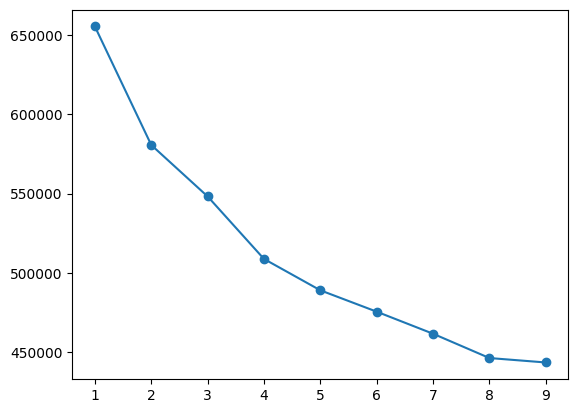

In [23]:
# Elbow method
sseList = []

for k in range(1, 10):
    k_model = KMeans(n_clusters=k, random_state=1)
    k_model.fit(x_scale)
    sseList.append(k_model.inertia_)

print(sseList)

# Plot graph
plt.plot(range(1, 10), sseList, marker="o")
plt.show()

From the graph, it seems that the graph does not have a clear elbow, which sometimes occur when the data is evenly distributed or doesn't have a clear cluster structure. I would chose 3 or 4. For this projects, that's use 4 as our K value.

In [24]:
# K value is 4
k_model = KMeans(n_clusters=4, random_state=1)
k_model.fit(x_scale)
labels = k_model.labels_
labels

array([3, 1, 3, ..., 2, 3, 2], dtype=int32)

Next, we will draw 3D scatter plot.

#### 3.4.4 3D Scatter Plot

When plotting a 3D plot, the best choices are **Average Purchase Value, Average Purchase Frequency Rate, and Average Customer Lifespan**, but we don't have this info available in our dataset. So, I will pick the most relevant three columns to plot a 3D graph.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


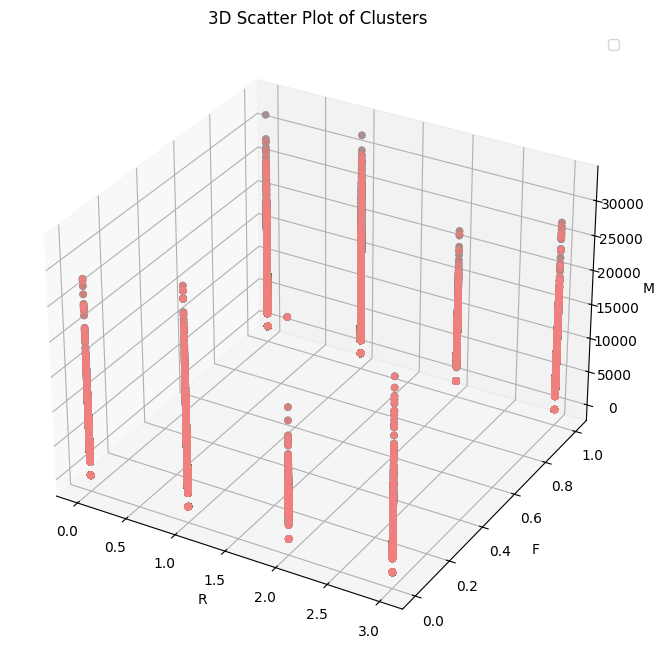

In [26]:
# Create canvas and 3D axis objects
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")

# Plot 3D graph
color = ["dodgerblue", "seagreen", "lightcoral"]

for i in range(0,3):
    d = x[labels == i]
    ax.scatter(df["income"], df["num_policies"], df["claim_amount"], color=color[i])

plt.title("3D Scatter Plot of Clusters")
ax.set_xlabel("R")
ax.set_ylabel("F")
ax.set_zlabel("M")
plt.legend()
plt.show()

## **Execute**

### 4.1 Reflection

From the final results, we can see that neither regression nor machine learning modeling gave us very ideal outcomes. From the last K-means 3D scatter plot, we couldn’t discern any useful insights.

The issue lies with the dataset. No matter how you look at it, this is not a very good dataset, and it lacks the information needed for CLV. However, this project is only meant to demonstrate my skills in regression and K-means, nothing more.

### 4.2 Conclusion

With the current dataset, due to missing information, we are unable to deconstruct and deeply analyze CLV effectively. If given the opportunity later, I will seek out a higher quality insurance dataset to reanalyze.